<a href="https://colab.research.google.com/github/Malikbadmus/model-validation-eos30gr/blob/main/notebooks/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***This notebook showcases data cleaning performed on small molecules compounds that have successfully completed all phases of clinical development and have received approval for use as well as Model Bias Evaluation on the Model. The datasets was sourced from ChEMBL by Malik Badmus as part of Outreachy 2024 Contribution.***

### Data Preprocessing

In [378]:
import os
import sys
import pandas as pd
# search path for modules 
sys.path.append(os.path.abspath("../src"))
DATAPATH = "../data"
SRC= "../src"

#File path
input_file_path = os.path.join(DATAPATH, "Raw", "mol_datasets1.csv")
output_file_path = os.path.join(DATAPATH, "Processed", "100_Molecules.csv")

# Reading the CSV file into a pandas DataFrame
Data = pd.read_csv(input_file_path, delimiter=';', quotechar='"')

In [379]:
#inspect the Dataframe
Data.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,Small molecule,4.0,308.42,19.0,61.0,3.72,37.30,...,23.0,2.0,1.0,0.0,308.1776,1.86,NEUTRAL,C21H24O2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...,BJJXHLWLUDYTGC-ANULTFPQSA-N
1,CHEMBL2106076,CEFPIROME SULFATE,CEFPIROME SULFATE|CEFPIROME SULFATE (1:1)|CEFP...,Small molecule,4.0,612.67,1.0,1.0,-1.04,153.92,...,35.0,11.0,3.0,2.0,514.1093,-0.19,ACID,C22H24N6O9S3,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[n...,RKTNPKZEPLCLSF-QHBKFCFHSA-N
2,CHEMBL1446650,MEBEVERINE HYDROCHLORIDE,COLOFAC|COLOFAC 100|COLOFAC IBS|COLOFAC MR|CSA...,Small molecule,4.0,466.02,15.0,44.0,4.60,57.23,...,31.0,6.0,0.0,0.0,429.2515,-0.60,BASE,C25H36ClNO5,CCN(CCCCOC(=O)c1ccc(OC)c(OC)c1)C(C)Cc1ccc(OC)c...,PLGQWYOULXPJRE-UHFFFAOYSA-N
3,CHEMBL3707281,MAGNESIUM LACTATE,"ANHYDROUS MAGNESIUM LACTATE, DL-|DL-LACTIC ACI...",Small molecule,4.0,202.44,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,202.0328,NaN,NaN,C6H10MgO6,CC(O)C(=O)[O-].CC(O)C(=O)[O-].[Mg+2],OVGXLJDWSLQDRT-UHFFFAOYSA-L
4,CHEMBL3833409,HYDROTALCITE,HYDROTALCITE,Small molecule,4.0,531.91,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,529.9019,NaN,NaN,CH16Al2Mg6O19,O=C([O-])[O-].[Al+3].[Al+3].[Mg+2].[Mg+2].[Mg+...,GDVKFRBCXAPAQJ-UHFFFAOYSA-A


In [380]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ChEMBL ID                        3592 non-null   object 
 1   Name                             3592 non-null   object 
 2   Synonyms                         3538 non-null   object 
 3   Type                             3592 non-null   object 
 4   Max Phase                        3592 non-null   float64
 5   Molecular Weight                 3522 non-null   float64
 6   Targets                          2954 non-null   float64
 7   Bioactivities                    2954 non-null   float64
 8   AlogP                            3166 non-null   float64
 9   Polar Surface Area               3166 non-null   float64
 10  HBA                              3166 non-null   float64
 11  HBD                              3166 non-null   float64
 12  #RO5 Violations     

***Based on the observations above, our dataframe has 33 column, a substantial amount of extraneous data, contributing to what we can described as "noise" in this context.***

***From the example (Notebook1) given we only need one (1) column to run predictions on ersilia, the canonical smile which is a standardized and unique representation of a molecular structure , the canonical smile is derived from the SMILES string contained in the "Smiles" column. The InChiKey is provided in the datasets but we can go ahead to standardized it to ensure consistency***

***Moreover, the Range index of 3,592 records, surpasses the number of molecules we need which is 1000. The Data therefore needs to be cleaned up.***

In [381]:
#Additional Verification
print(Data.iloc[890])

ChEMBL ID                                                              CHEMBL4216467
Name                                                                      RIPRETINIB
Synonyms                                                 DCC-2618|QINLOCK|RIPRETINIB
Type                                                                  Small molecule
Max Phase                                                                        4.0
Molecular Weight                                                              510.37
Targets                                                                          6.0
Bioactivities                                                                   22.0
AlogP                                                                           5.67
Polar Surface Area                                                             88.05
HBA                                                                              5.0
HBD                                                              

In [382]:
from processing import standardise_smiles, standardise_inchikey


new_columns = ['Smiles', 'Inchi Key']
N_Data = Data.drop(columns=Data.columns.difference(new_columns)).dropna(subset=['Smiles'])

#Standardizing the SMILES string and creating the canonical smiles
N_Data['Canonical_smiles'] = standardise_smiles(N_Data['Smiles'])
N_Data['Inchi Key'] = standardise_inchikey(N_Data['Inchi Key'])
N_Data.info()


[20:39:37] WARNING: not removing hydrogen atom without neighbors
[20:39:37] WARNING: not removing hydrogen atom without neighbors
[20:39:37] WARNING: not removing hydrogen atom without neighbors
[20:39:37] WARNING: not removing hydrogen atom without neighbors
[12/03/24 20:39:38 standardiser.neutralise WARNING] zwitterion with more negative charges than quaternary positive centres detected
[20:39:39] Can't kekulize mol.  Unkekulized atoms: 0 2 4 6 7 9
[12/03/24 20:39:41 standardiser.neutralise WARNING] zwitterion with more negative charges than quaternary positive centres detected
[12/03/24 20:39:44 standardiser.neutralise WARNING] zwitterion with more negative charges than quaternary positive centres detected
[20:39:45] Can't kekulize mol.  Unkekulized atoms: 3 10
[12/03/24 20:39:51 standardiser.neutralise WARNING] zwitterion with more negative charges than quaternary positive centres detected
[12/03/24 20:39:52 standardiser.neutralise WARNING] zwitterion with more negative charges tha

<class 'pandas.core.frame.DataFrame'>
Index: 3384 entries, 0 to 3591
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Smiles            3384 non-null   object
 1   Inchi Key         3384 non-null   object
 2   Canonical_smiles  3102 non-null   object
dtypes: object(3)
memory usage: 105.8+ KB


**We can inspect our new Datasets**

In [383]:
N_Data.head()

,Smiles,Inchi Key,Canonical_smiles
0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...,BJJXHLWLUDYTGC-ANULTFPQSA-N,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...
1,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[n...,RKTNPKZEPLCLSF-QHBKFCFHSA-N,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[n...
2,CCN(CCCCOC(=O)c1ccc(OC)c(OC)c1)C(C)Cc1ccc(OC)c...,PLGQWYOULXPJRE-UHFFFAOYSA-N,CCN(CCCCOC(=O)c1ccc(OC)c(OC)c1)C(C)Cc1ccc(OC)cc1
3,CC(O)C(=O)[O-].CC(O)C(=O)[O-].[Mg+2],OVGXLJDWSLQDRT-UHFFFAOYSA-L,NaN
4,O=C([O-])[O-].[Al+3].[Al+3].[Mg+2].[Mg+2].[Mg+...,GDVKFRBCXAPAQJ-UHFFFAOYSA-A,NaN


***From the above, we can see that the RDKit cound not kekulized 282 molecules and thus return null values for Canonical smiles. Our datasets also contains three (3) features, the SMILES string, Standardized smile string and an identifier.***

In [384]:
check_columns = 'Canonical_smiles'  

# Drop rows with null values in Smiles, select 1000 molecules
Updated_Data = N_Data.dropna(subset=['Canonical_smiles'])
New_Data = Updated_Data.sample(n=1000, random_state=42)  

New_Data.drop(columns=['Smiles'], inplace=True)
New_Data.rename(columns={'Canonical_smiles': 'smiles'}, inplace=True)
New_Data.reset_index(drop=True, inplace=True)

In [385]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Inchi Key  1000 non-null   object
 1   smiles     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [386]:
New_Data.head()

,Inchi Key,smiles
0,IPVQLZZIHOAWMC-QXKUPLGCSA-N,CCC[C@H](N[C@@H](C)C(=O)N1[C@H](C(=O)O)C[C@@H]...
1,GBXSMTUPTTWBMN-XIRDDKMYSA-N,CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1CCC[...
2,ZIIJJOPLRSCQNX-UHFFFAOYSA-N,CCN(CC)CCN1C(=O)CN=C(c2ccccc2F)c2cc(Cl)ccc21
3,QZFHIXARHDBPBY-UHFFFAOYSA-N,COC(=O)Nc1c(N)nc(-c2nn(Cc3ccccc3F)c3ncc(F)cc23...
4,VBHQKCBVWWUUKN-KZNAEPCWSA-N,COc1ccc(CCO[C@@H]2CCCC[C@H]2N2CC[C@@H](O)C2)cc1OC


***All the Null values have been dropped and a list of 1000 molecules have been selected for our new datasets. We can go ahead and save our new datasets to /data/Processed in a csv format.***

In [387]:
# Save the DataFrame to a CSV file

New_Data.to_csv(output_file_path, index=False)

### Getting our predictions on the Processed Dataset


***The model eos30f3 was downloaded and serve via the Ersilia Model Hub on my linux Ubuntu 22.4.0 system, the input file (eos30f3_output.csv) was parsed to it and a prediction probabilities for the 1000 molecules was generated, the Model Prediction was saved at /data/Model_prediction in a csv format.***

### Model Bias Evaluation

In [388]:
# Load the Model Predictions
Model_predictions = pd.read_csv(os.path.join(DATAPATH, "Model_predictions", "eos30f3_output.csv"))

Inspect the DataFrame

In [389]:
Model_predictions.head()

,key,input,activity
0,IPVQLZZIHOAWMC-QXKUPLGCSA-N,CCC[C@H](N[C@@H](C)C(=O)N1[C@H](C(=O)O)C[C@@H]...,0.141321
1,GBXSMTUPTTWBMN-XIRDDKMYSA-N,CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1CCC[...,0.235772
2,SAADBVWGJQAEFS-UHFFFAOYSA-N,CCN(CC)CCN1C(=O)CN=C(c2ccccc2F)c2cc(Cl)ccc21,0.853313
3,QZFHIXARHDBPBY-UHFFFAOYSA-N,COC(=O)Nc1c(N)nc(-c2nn(Cc3ccccc3F)c3ncc(F)cc23...,0.225853
4,VBHQKCBVWWUUKN-KZNAEPCWSA-N,COc1ccc(CCO[C@@H]2CCCC[C@H]2N2CC[C@@H](O)C2)cc1OC,0.836128


In [390]:
Model_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   key       1000 non-null   object 
 1   input     1000 non-null   object 
 2   activity  1000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


***From the above we can deduce that our prediction data contains three (3) features, the identifier inchikey which is now key, input which is our smiles string, and an activity  column which denotes the predicted probability of compound activity, specifically indicating their potential as heRG blockers, with a predefined threshold set at 10uM.***

### Visualizing the Data



In [391]:

def generate_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    finger_prints = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2)
    array = np.zeros((1,), dtype=np.int8)
    Chem.DataStructs.ConvertToNumpyArray(finger_prints, array)
    return array


# Threshold set for hERG inhibitors 
hERG_blockers_threshold = 0.5

Model_predictions['Fingerprint'] = Model_predictions['input'].apply(generate_fingerprint)

# Combine fingerprints into a single array
fingerprints = np.vstack(Model_predictions['Fingerprint'])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(fingerprints)

Model_predictions.head()


,key,input,activity,Fingerprint
0,IPVQLZZIHOAWMC-QXKUPLGCSA-N,CCC[C@H](N[C@@H](C)C(=O)N1[C@H](C(=O)O)C[C@@H]...,0.141321,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,GBXSMTUPTTWBMN-XIRDDKMYSA-N,CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1CCC[...,0.235772,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,SAADBVWGJQAEFS-UHFFFAOYSA-N,CCN(CC)CCN1C(=O)CN=C(c2ccccc2F)c2cc(Cl)ccc21,0.853313,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,QZFHIXARHDBPBY-UHFFFAOYSA-N,COC(=O)Nc1c(N)nc(-c2nn(Cc3ccccc3F)c3ncc(F)cc23...,0.225853,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,VBHQKCBVWWUUKN-KZNAEPCWSA-N,COc1ccc(CCO[C@@H]2CCCC[C@H]2N2CC[C@@H](O)C2)cc1OC,0.836128,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


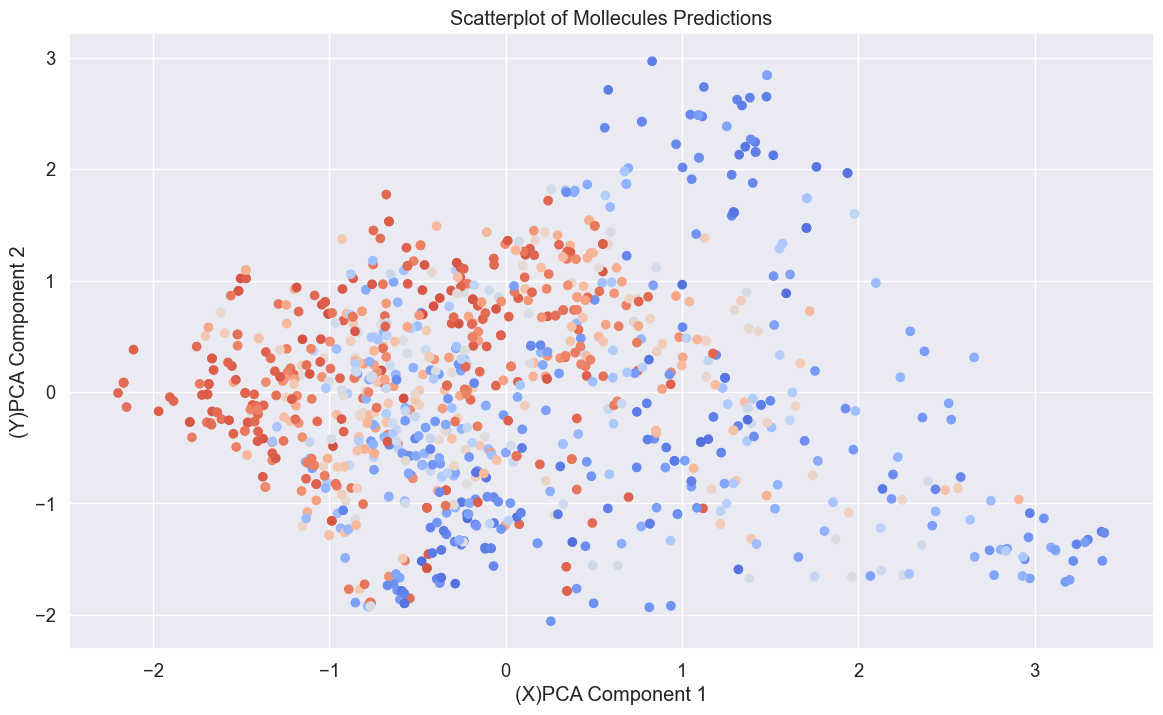

In [392]:
import matplotlib.colors as mcolors

def custom_norm(x):
    return 1 if x >= 0.5 else 0

# scatter plot with adjusted color points threshold
plt.figure(figsize=(14, 8))  
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=Model_predictions['activity'], cmap='coolwarm', norm=mcolors.TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.5))
plt.xlabel('(X)PCA Component 1')
plt.title('Scatterplot of Mollecules Predictions')
plt.ylabel('(Y)PCA Component 2')

# Save the plot 
plt.savefig('../figures/scattter_plot.png')
plt.show()


***The red data points represents Molecules with predictions probability above 0.5, i.e molecules that are hERG blockers, while the Blue data points represents molecules with predictions probability of less than 0.5, i.e molecules that are hERG non blockers***

***There are a number of observations that can be drawn from the scatter plots, one of the most significant is that molecules that are hERG blockers (Red) cluster seperately, this suggests that these molecules share common structural features that contribute to their hERG blocking activity, it also suggest that the technique that we use to featurize our SMILES string, Morgan Fingerprints, extracted features relevant to hERG activity and can effectively discriminate between Toxic and Non-Toxic compounds, in demonstrating its ability to capture meaningful patterns in the data, is also validate the Eos30f3 model as a predictor of hERG-mediated cardiotoxicity***


***Let us better visualize the distribution of the molecules Activity***

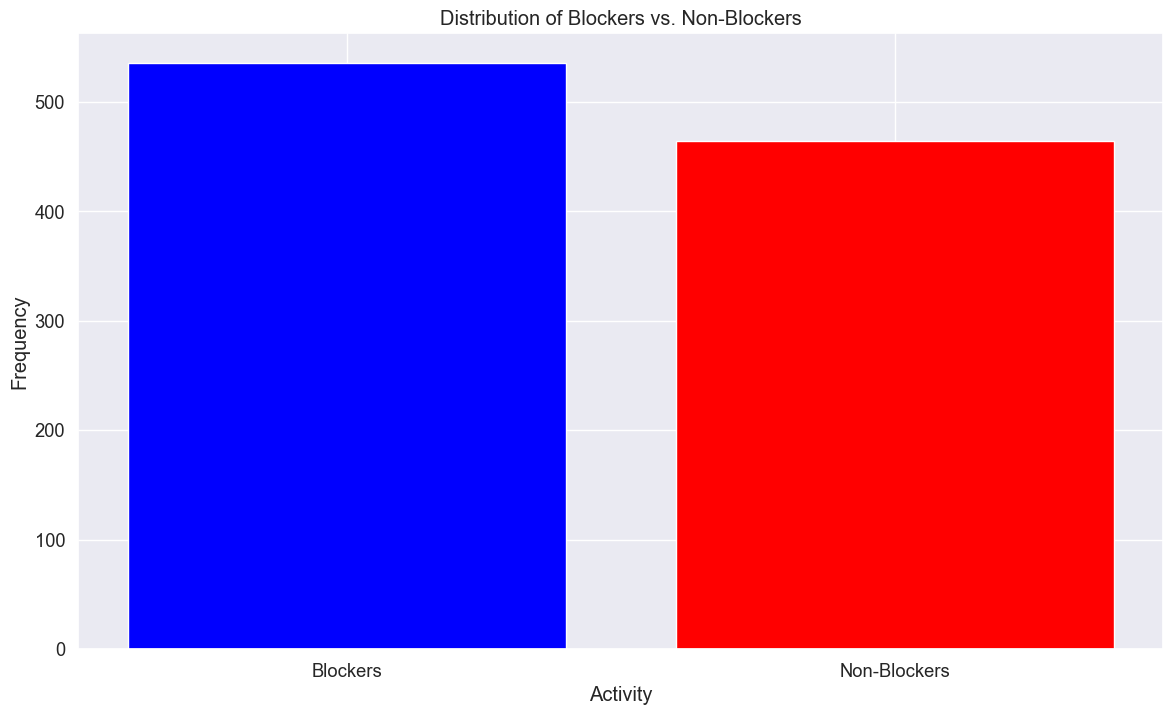

In [393]:
Model_predictions['class'] = ['Blockers' if prob >= hERG_blockers_threshold else 'Non-Blockers' for prob in Model_predictions['activity']]

# Count the frequencies of the two classes
class_counts = Model_predictions['class'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(14, 8))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.title('Distribution of Blockers vs. Non-Blockers')

# Show the plot
plt.show()

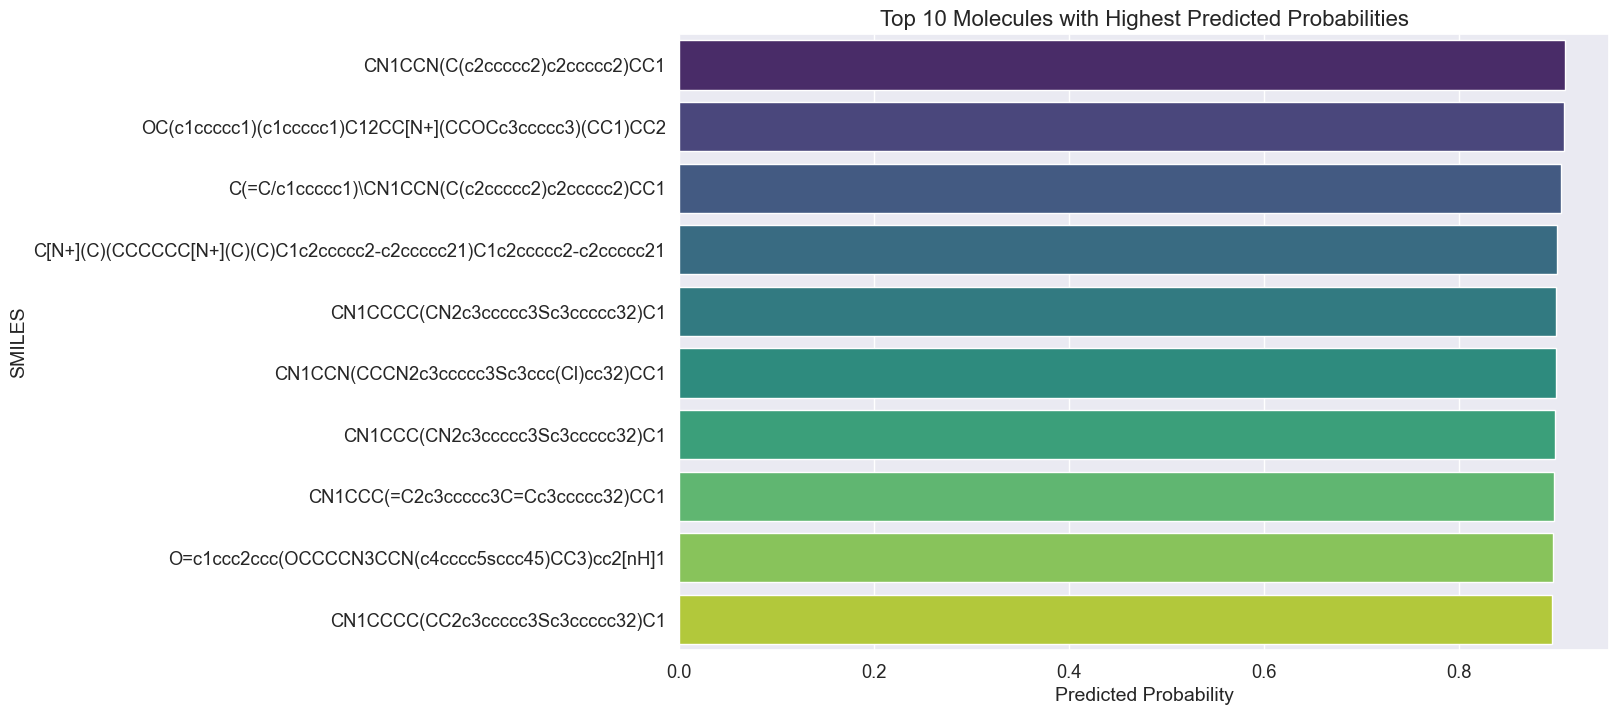

In [394]:
# Create a bar plot
top_predictions = Model_predictions.sort_values(by='activity', ascending=False).head(11)
color_palette = sns.color_palette("viridis", len(top_predictions)-1)
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
sns.barplot(x='activity', y='input', hue='input', data=top_predictions, palette=color_palette, dodge=False)
plt.xlabel('Predicted Probability', fontsize=14)
plt.ylabel('SMILES', fontsize=14)
plt.title('Top 10 Molecules with Highest Predicted Probabilities', fontsize=16)
plt.grid(True, axis='x')

figure_path = '../figures/High_pred_mol.png'
plt.savefig(figure_path, bbox_inches='tight')

# Show the plot
plt.show()

C:\Users\Control\AppData\Local\Temp\ipykernel_13340\3940236299.py:5: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x='activity', y='input', hue='input', data=low_predictions, palette=color_palette, dodge=False)


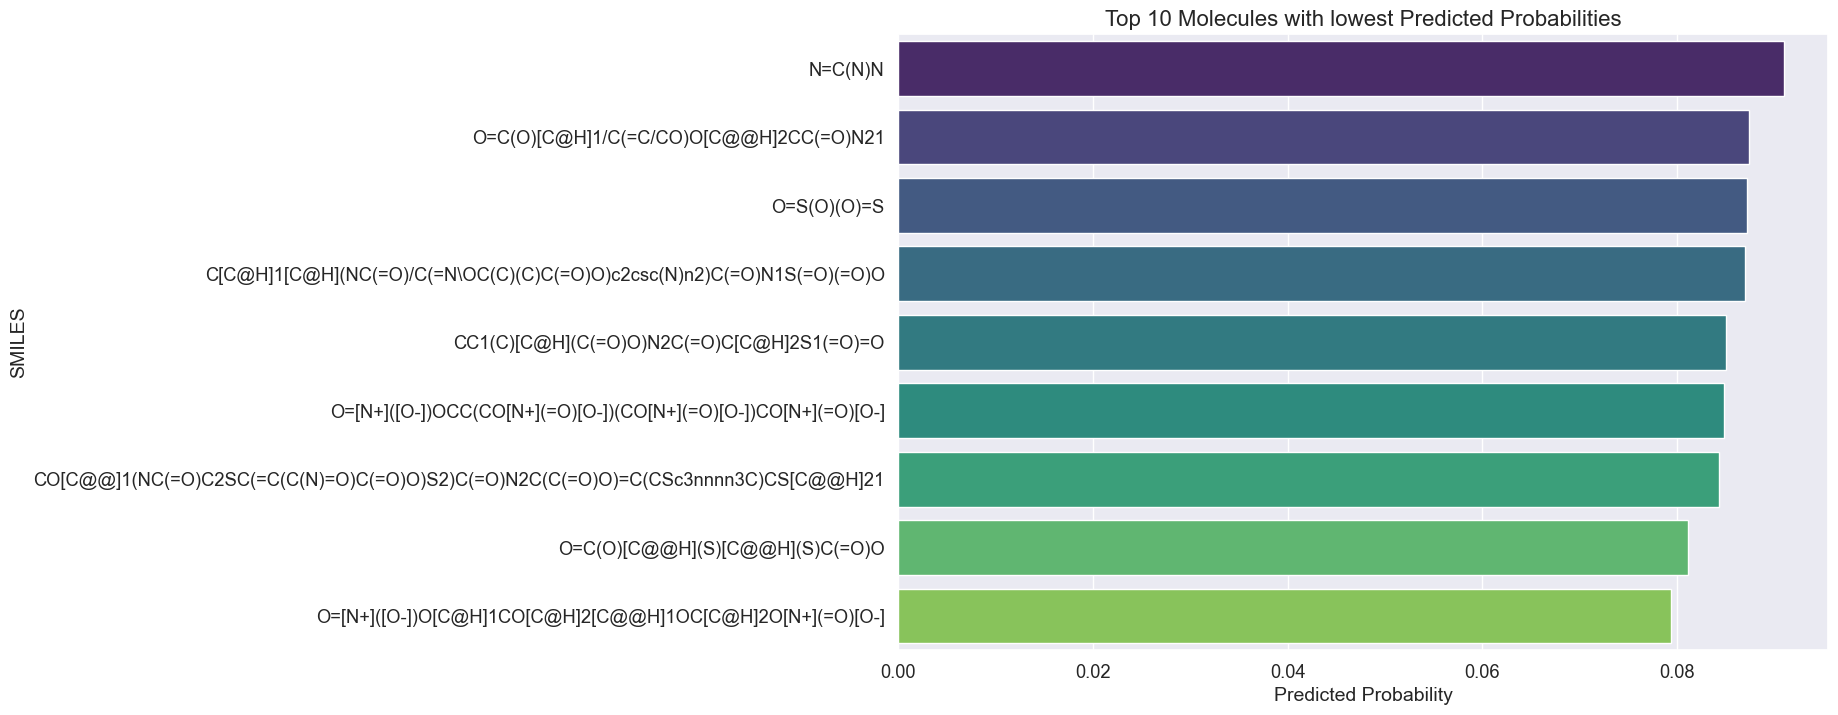

In [395]:
low_predictions = Model_predictions.sort_values(by='activity', ascending=False).tail(11)
color_palette = sns.color_palette("viridis", len(low_predictions)-1)
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
sns.barplot(x='activity', y='input', hue='input', data=low_predictions, palette=color_palette, dodge=False)
plt.xlabel('Predicted Probability', fontsize=14)
plt.ylabel('SMILES', fontsize=14)
plt.title('Top 10 Molecules with lowest Predicted Probabilities', fontsize=16)
plt.grid(True, axis='x')

figure_path = '../figures/low_pred_mol.png'
plt.savefig(figure_path, bbox_inches='tight')

# Show the plot
plt.show()

In [398]:
num_hERG_blockers = Model_predictions[Model_predictions['activity'] >= hERG_blockers_threshold].shape[0]
num_hERG_non_blockers = Model_predictions[Model_predictions['activity'] < hERG_blockers_threshold].shape[0]

print("Number of 'hERG blockers' Molecules:", num_hERG_blockers)
print("Number of 'hERG non blockers' Molecules:", num_hERG_non_blockers)

Number of 'hERG blockers' Molecules: 536
Number of 'hERG non blockers' Molecules: 464


***Since we are in the realm of Drug discovery, the consequences of false negatives are more severe than false positives,we dont want to misclassified a harmful drug as harmless, this led us to adopt a lower threshold for hERG blockers, we chose to priotize sensitivity over specifity. from our Model Predictions Data, the number of molecules that inhibits hERG potassium ion channel is **536** , While **464** are classified as 'Non blockers'.***

***The top 10 Molecules with the Highest predicted probabilites have almost the same acttivity values, and this can be seen and validated from our bar chart plot***  

***In order to assess the potential bias inherent in our model, whether it has a positive bias, model consistently predicting values that are much higher than the actual values, or it has a Negative Bias, model consistently predicting values that are much lower than the actual values. A Random selection of 5 compounds and their predicted probability values from each categories is gotten and compared against the ground truth value gotten from DrugBank database of the same compounds.*** 

***This comparison will serves as a critical validation step to ascertain the reliability and accuracy of our eos30f3 model.***

In [370]:
hERG_blockers = Model_predictions[Model_predictions['hue'] == 'hERG blockers']
hERG_non_blockers = Model_predictions[Model_predictions['hue'] == 'hERG non blockers']

# Randomly select 5 samples from each category
random_hERG_blockers = hERG_blockers.sample(n=5, random_state=42)
random_hERG_non_blockers = hERG_non_blockers.sample(n=5, random_state=42)
selected_samples = pd.concat([random_hERG_blockers, random_hERG_non_blockers])

In [371]:
selected_samples.head(10)


,key,input,activity,hue,Fingerprint,class
411,INDBQLZJXZLFIT-UHFFFAOYSA-N,COc1cc(NC(C)CCCN)c2ncccc2c1,0.842802,hERG blockers,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Blockers
86,PLDUPXSUYLZYBN-UHFFFAOYSA-N,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1,0.892616,hERG blockers,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Blockers
34,ZZHLYYDVIOPZBE-UHFFFAOYSA-N,CC(CN(C)C)CN1c2ccccc2Sc2ccccc21,0.876742,hERG blockers,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Blockers
882,JAUOIFJMECXRGI-UHFFFAOYSA-N,Clc1ccc2c(c1)CCc1cccnc1C2=C1CCNCC1,0.869533,hERG blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Blockers
133,GXESHMAMLJKROZ-IAPPQJPRSA-N,Oc1ccc2c(c1)CC[C@H](c1ccccc1)[C@@H]2c1ccc(OCCN...,0.863002,hERG blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",Blockers
149,LPQZKKCYTLCDGQ-WEDXCCLWSA-N,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,0.096891,hERG non blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Non-Blockers
566,OCUJLLGVOUDECM-UHFFFAOYSA-N,CNCC(O)c1ccc(OC(=O)C(C)(C)C)c(OC(=O)C(C)(C)C)c1,0.250664,hERG non blockers,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Non-Blockers
895,MNSCVRXKDINXEY-UHFFFAOYSA-N,CN1C(C(=O)Nc2ccccn2)C(=O)c2ccccc2S1(=O)=O,0.400626,hERG non blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Non-Blockers
353,PPTYJKAXVCCBDU-UHFFFAOYSA-N,CN1C(=O)CN=C(c2ccccc2F)c2cc([N+](=O)[O-])ccc21,0.359153,hERG non blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Non-Blockers
986,RZVAJINKPMORJF-UHFFFAOYSA-N,CC(=O)Nc1ccc(O)cc1,0.551709,hERG non blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Blockers


### Visual Representation of the Molecules

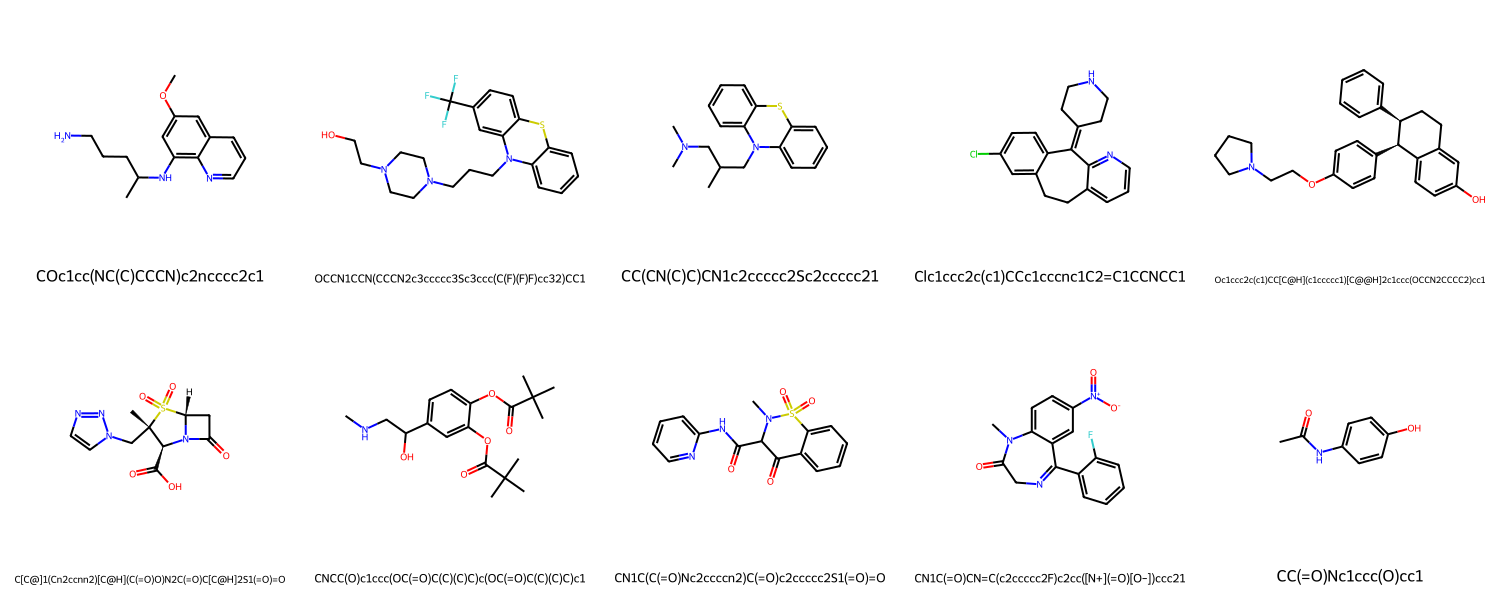

In [372]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

P_smiles = random_hERG_blockers["input"]
N_smiles = random_hERG_non_blockers["input"]

# Convert SMILES to RDKit Mol objects
P_mols = [Chem.MolFromSmiles(smi) for smi in P_smiles]
N_mols = [Chem.MolFromSmiles(smi) for smi in N_smiles]

# Set molecule names as SMILES strings
for mol, smi in zip(P_mols, P_smiles):
    mol.SetProp("_Name", smi)
for mol, smi in zip(N_mols, N_smiles):
    mol.SetProp("_Name", smi)

# Combine molecules
all_mols = P_mols + N_mols

# Generate grid image
img = Draw.MolsToGridImage(all_mols, molsPerRow=5, subImgSize=(300, 300), legends=[mol.GetProp("_Name") for mol in all_mols])


# Display the image
display(img)


### Data Comparison


***Comparing the Compound Predictions Gotten from the Model eos30f3 with Predictions of hERG inhibitors on the same Compounds Gotten from DrugBank Database.***

In [373]:
import pandas as pd

merged_df = pd.merge(Data[['Inchi Key', 'Name']], selected_samples, left_on="Inchi Key", right_on="key", how="right")
merged_df.drop(columns=['key', 'Inchi Key'], inplace=True)
merged_df.head(10)


,Name,input,activity,hue,Fingerprint,class
0,PRIMAQUINE,COc1cc(NC(C)CCCN)c2ncccc2c1,0.842802,hERG blockers,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Blockers
1,FLUPHENAZINE,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1,0.892616,hERG blockers,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Blockers
2,METHYLPROMAZINE,CC(CN(C)C)CN1c2ccccc2Sc2ccccc21,0.876742,hERG blockers,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Blockers
3,DESLORATADINE,Clc1ccc2c(c1)CCc1cccnc1C2=C1CCNCC1,0.869533,hERG blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Blockers
4,LASOFOXIFENE,Oc1ccc2c(c1)CC[C@H](c1ccccc1)[C@@H]2c1ccc(OCCN...,0.863002,hERG blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",Blockers
5,TAZOBACTAM,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,0.096891,hERG non blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Non-Blockers
6,DIPIVEFRIN,CNCC(O)c1ccc(OC(=O)C(C)(C)C)c(OC(=O)C(C)(C)C)c1,0.250664,hERG non blockers,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Non-Blockers
7,NaN,CN1C(C(=O)Nc2ccccn2)C(=O)c2ccccc2S1(=O)=O,0.400626,hERG non blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Non-Blockers
8,FLUNITRAZEPAM,CN1C(=O)CN=C(c2ccccc2F)c2cc([N+](=O)[O-])ccc21,0.359153,hERG non blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Non-Blockers
9,ACETAMINOPHEN,CC(=O)Nc1ccc(O)cc1,0.551709,hERG non blockers,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Blockers


In [374]:
# Ground truth Data for the 10 Drugs was sourced from DrugBank see here https://go.drugbank.com/unearth/q?searcher=drugs&query=ACETAMINOPHEN&button=  and compiled by me.

Drugbank_Predictions = pd.read_csv(os.path.join(DATAPATH, "Processed", "10_Mol_Drug_bank.csv"))

Drugbank_Predictions.head(10)

,Name,Predictions,Probability
0,PRIMAQUINE,hERG blockers,0.8162
1,FLUPHENAZINE,hERG blockers,0.8157
2,METHYLPROMAZINE,hERG blockers,0.8180
3,DESLORATADINE,hERG blockers,0.8016
4,LASOFOXIFENE,hERG blockers,0.6914
5,TAZOBACTAM,hERG non blockers,0.8552
6,DIPIVEFRIN,hERG non blockers,0.8847
7,PIROXICAM,hERG non blockers,0.8311
8,FLUNITRAZEPAM,hERG non blockers,0.8074
9,ACETAMINOPHEN,hERG non blockers,0.9597


***Since DrugBank provides probability of binary predictions (inhibitors or non-inhibitors), and continuous probabilities is needed for comparison, to convert these probabilities of  binary predictions into continous probabilities, i will substract 1 from the hERG non blocker class.***

In [375]:
def convert_to_probability(pred_blocker):
    
    pred_non_blocker = 1 - pred_blocker
    return pred_non_blocker

condition = Drugbank_Predictions['Predictions'] == 'hERG non blockers'

Drugbank_Predictions.loc[condition, 'Probability'] = Drugbank_Predictions.loc[condition, 'Probability'].apply(convert_to_probability)
Drugbank_Predictions.rename(columns={'Predictions': 'hue', 'Probability': 'activity'}, inplace=True)
Drugbank_Predictions.head(10)

,Name,hue,activity
0,PRIMAQUINE,hERG blockers,0.8162
1,FLUPHENAZINE,hERG blockers,0.8157
2,METHYLPROMAZINE,hERG blockers,0.8180
3,DESLORATADINE,hERG blockers,0.8016
4,LASOFOXIFENE,hERG blockers,0.6914
5,TAZOBACTAM,hERG non blockers,0.1448
6,DIPIVEFRIN,hERG non blockers,0.1153
7,PIROXICAM,hERG non blockers,0.1689
8,FLUNITRAZEPAM,hERG non blockers,0.1926
9,ACETAMINOPHEN,hERG non blockers,0.0403


In [376]:

model_pred = merged_df['activity']
original_pred = Drugbank_Predictions['activity']

prediction_error = model_pred - original_pred
std_dev = Drugbank_Predictions['activity'].std()
mean_prediction_error = prediction_error.mean()
print("Standard Deviation of Original Predictions:", std_dev)
print("Mean Prediction Error:", mean_prediction_error)



Standard Deviation of Original Predictions: 0.34997751292841023
Mean Prediction Error: 0.139893591


***Looking at the Molecule results of the comparison done on predictions on Model eos30f3 from Ersilia Model Hub and predictions from Drugbank, we got a MPE that is way less than the Standard Deviation, implying that the errors made by the model are relatively small and the model's predictions are reasonably accurate on average.***

### 